In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats

import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path_to_file = '/content/drive/My Drive/Colab Notebooks/Cave_Data/'
# data_xls = pd.read_excel(path_to_file + 'OxygenandTempinPivkaRiver.xlsx', '18.4.20-17.11.20', dtype=str, index_col=None)
# data_xls.to_csv(path_to_file+'OxygenandTemp3.csv', encoding='utf-8', index=False)

In [ ]:
# data_xls = pd.read_excel(path_to_file + 'OxygenandTempinPivkaRiver.xlsx', '13.8.18-17.11.18', dtype=str, index_col=None)
# data_xls.to_csv(path_to_file+'OxygenandTemp2.csv', encoding='utf-8', index=False)

### 2017 Data (Dissolved Oxygen - River Temperature) 

In [ ]:
data_csv1 = pd.read_csv(path_to_file + 'OxygenandTemp1.csv', sep=',', parse_dates=[['Date', 'Time']])
data_csv1.head(3)

,Date_Time,DO (mg/L),Temp (°C)
0,2017-04-24 15:00:00,17.61,10.94
1,2017-04-24 15:15:00,17.53,10.94
2,2017-04-24 15:30:00,17.60,10.96


### Pre-Processing + Initial Checks

In [ ]:
print ('max & min of date:', data_csv1['Date_Time'].max(), data_csv1['Date_Time'].min())
print ('max & min of oxygen: ', data_csv1['DO (mg/L)'].max(), data_csv1['DO (mg/L)'].min(), data_csv1['DO (mg/L)'].mean())
print ('max & min of Temp: ', data_csv1['Temp (°C)'].max(), data_csv1['Temp (°C)'].min())

max & min of date: 2017-11-23 10:15:00 2017-04-24 15:00:00
max & min of oxygen:  17.67 0.0 7.567484581497799
max & min of Temp:  28.88 4.9


In [ ]:
(data_csv1['DO (mg/L)'] == 0.0).sum()

3

In [ ]:
cave_data1 = data_csv1.rename({'Date_Time': 'datetime' ,'DO (mg/L)': 'Oxygen', 'Temp (°C)': 'Temp'}, axis=1)
cave_data1.head(3)

,datetime,Oxygen,Temp
0,2017-04-24 15:00:00,17.61,10.94
1,2017-04-24 15:15:00,17.53,10.94
2,2017-04-24 15:30:00,17.60,10.96


In [ ]:
print ('NaNs in every column: \n', cave_data1.isna().sum())

NaNs in every column: 
 datetime    0
Oxygen      0
Temp        0
dtype: int64


In [ ]:
cave_data1['datetime'] = pd.to_datetime(cave_data1['datetime'])
cave_data1 = cave_data1.set_index('datetime') 

In [ ]:
print (cave_data1.head(10))
print ('\n')
print ('cave data shape: ', cave_data1.shape)

                     Oxygen   Temp
datetime                          
2017-04-24 15:00:00   17.61  10.94
2017-04-24 15:15:00   17.53  10.94
2017-04-24 15:30:00   17.60  10.96
2017-04-24 15:45:00   17.66  10.98
2017-04-24 16:00:00   17.67  11.00
2017-04-24 16:15:00   17.61  11.02
2017-04-24 16:30:00   17.59  11.02
2017-04-24 16:45:00   17.44  11.02
2017-04-24 17:00:00   17.48  11.04
2017-04-24 17:15:00   17.38  11.02


cave data shape:  (20430, 2)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f770ce50850>,
      dtype=object)

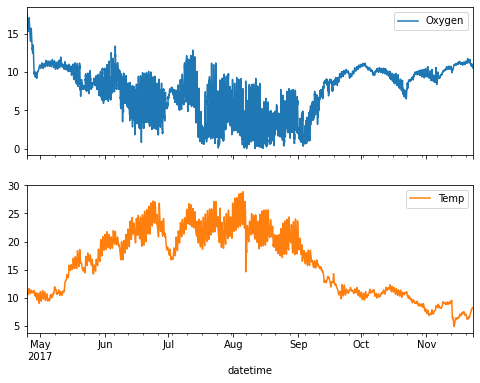

In [ ]:
cave_data1.plot(subplots=True, figsize=(8,6))

select dataframe shape:  (14593, 2)


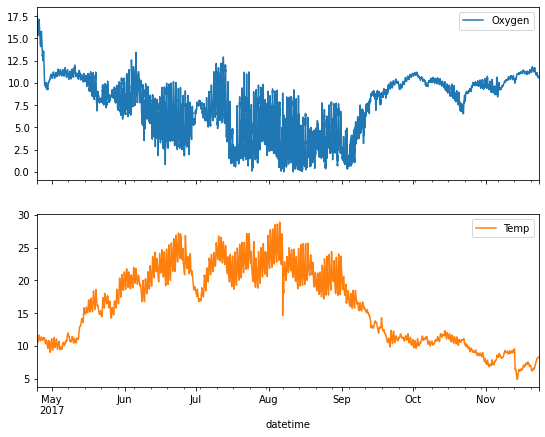

In [ ]:
### select  a subset of the data-frame 

cave_data1_may_sept = cave_data1["2017-05-01 15:00:00": "2017-09-30 15:00:00"]
# selection from May to September 30th

print ('select dataframe shape: ', cave_data1_may_sept.shape)

fig, ax = cave_data1.plot(subplots=True, figsize=(9, 7))

(130, 2)


Text(0.5, 0, '')

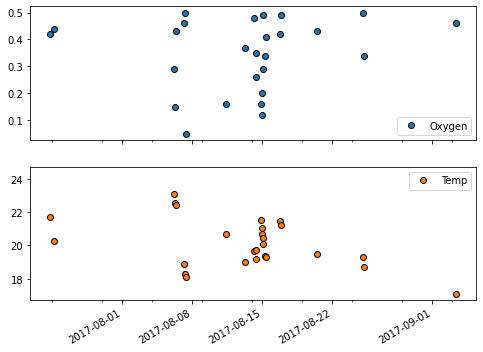

In [ ]:
#### select parts of dataframe based on column value ['Oxygen']

cave_data1_may_sept_O2_0_2d5 = cave_data1_may_sept[(cave_data1_may_sept['Oxygen'] >= 0.01) & (cave_data1_may_sept['Oxygen'] <= 0.5)]

print (cave_data1_may_sept_O2_0_2d5.shape)

fig, ax = cave_data1_may_sept_O2_0_2d5.plot(subplots=True, figsize=(8, 6), linestyle='None', 
                                            markevery=5, marker='o', 
                                            markeredgecolor='black')
ax.set_xlabel('')

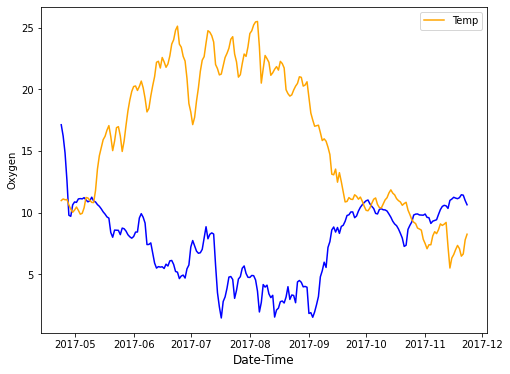

In [ ]:
resampled_oxygen1 = cave_data1["Oxygen"].resample("D").mean() # daily samples
resampled_temp1 = cave_data1["Temp"].resample("D").mean() # daily samples

#fig = plt.figure(figsize=(8, 6))
fig, ax1 = plt.subplots(figsize=(8, 6))
sns.lineplot(data = resampled_oxygen1, color='blue')
#ax2 = plt.twinx()
sns.lineplot(data = resampled_temp1, label='Temp', color='orange', dashes=[(1)])
#ax1.set_ylabel('Temp')
plt.xlabel('Date-Time', fontsize=12)
plt.legend()
#plt.savefig(path_to_file + '/plots/oxygen_temp_dailymean.png', dpi=300)

plt.show()

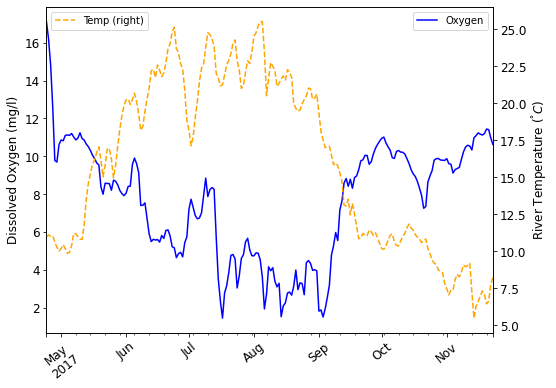

In [ ]:
resampled_oxygen1_Daily_org = cave_data1["Oxygen"].resample("D").mean() # hourly samples
resampled_temp1_Daily_org = cave_data1["Temp"].resample("D").mean() # hourly samples

ax = resampled_oxygen1_Daily_org.plot(color='blue', label='Oxygen', figsize=(8, 6))
ax2 = resampled_temp1_Daily_org.plot(secondary_y=True, color='orange', ax=ax, linestyle='--', label='Temp')

ax.set_ylabel('Dissolved Oxygen (mg/l)', fontsize=12)
ax2.set_ylabel(r'River Temperature $({}^{\degree} C)$', fontsize=12)
ax.set_xlabel('')
ax.tick_params(axis='x', which='major', labelsize=12, rotation=39)
ax.tick_params(axis='y', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax.legend()
ax2.legend(loc=2)

# plt.savefig(path_to_file + '/plots/oxygen_temp_dailymean.png', dpi=300)
plt.show()

In [ ]:
len(resampled_oxygen1)

214

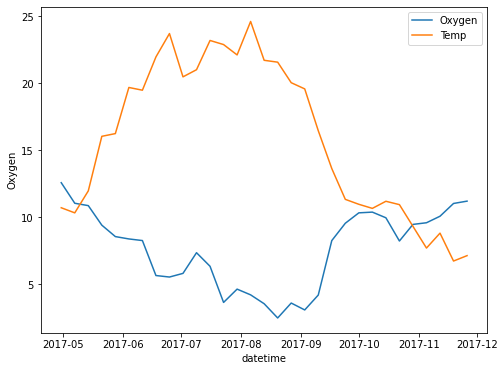

In [ ]:
resampled_oxygen1_w = cave_data1["Oxygen"].resample("W").mean() # daily samples
resampled_temp1_w = cave_data1["Temp"].resample("W").mean() # daily samples

fig = plt.figure(figsize=(8, 6))
sns.lineplot(data = resampled_oxygen1_w, label='Oxygen')
sns.lineplot(data = resampled_temp1_w, label='Temp')
plt.show()

In [ ]:
decomposed_cave_oxygen1 = sm.tsa.seasonal_decompose(cave_data1['Oxygen'], period = 96*7, model='additive') 

# plt.rcParams["figure.figsize"] = (9, 7)
# fig = decomposed_cave_oxygen1.plot()
# plt.yticks(fontsize=10)
# #plt.title('Dissolved Oxygen (mg/l)', fontsize=12)
# # # plt.xlabel('Date-Time', fontsize=12)
# # #plt.savefig(path_to_file + '/plots/seasonal_decomp_O2_2017.png', dpi=300)

# plt.show()
# #print(decomposed_cave_oxygen1.resid)

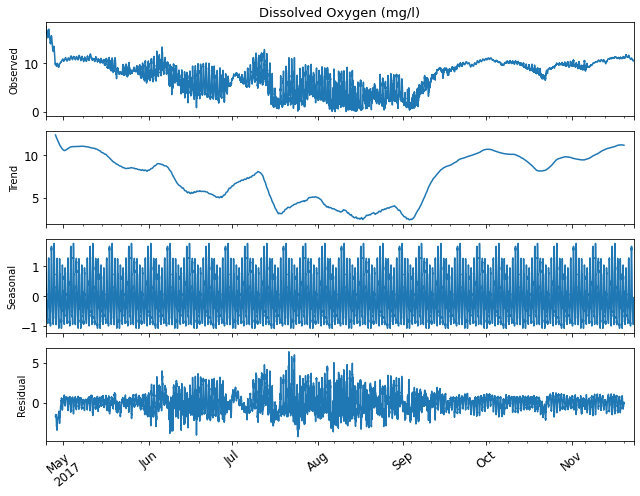

In [ ]:
fig, ax = plt.subplots(4, figsize=(9, 7), sharex=True)

decomposed_cave_oxygen1.observed.plot(ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('Observed', fontsize=10)
ax[0].set_title('Dissolved Oxygen (mg/l)', fontsize=13)
ax[0].tick_params(axis='y', which='major', labelsize=12)
decomposed_cave_oxygen1.trend.plot(ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('Trend', fontsize=10)
ax[1].tick_params(axis='y', which='major', labelsize=12)
decomposed_cave_oxygen1.seasonal.plot(ax=ax[2])
ax[2].set_xlabel('')
ax[2].set_ylabel('Seasonal', fontsize=10)
ax[2].tick_params(axis='y', which='major', labelsize=12)
decomposed_cave_oxygen1.resid.plot(ax=ax[3])
ax[3].set_xlabel('')
ax[3].set_ylabel('Residual', fontsize=10)
ax[3].tick_params(axis='y', which='major', labelsize=12)
ax[3].tick_params(axis='x', which='major', labelsize=12, rotation=39)
plt.tight_layout()
# plt.savefig(path_to_file + '/plots/seasonal_decomp_O2_2017_final.png', dpi=300)
plt.show()

In [ ]:
!pip install git+https://github.com/statsmodels/statsmodels.git

  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-n9be6ad9
  Running command git clone -q https://github.com/statsmodels/statsmodels.git /tmp/pip-req-build-n9be6ad9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.14.0.dev0+5.g123cca12e-cp37-cp37m-linux_x86_64.whl size=17840300 sha256=d6846c9fecbbc8657458e95333ad313c408c39f07fac2b0f7b2c5a88d73652cb
  Stored in directory: /tmp/pip-ephem-wheel-cache-60q6s16d/wheels/5c/ab/d8/d9505a18dd992621edd24cfddb9a1bd694dee85c065c0a6e57
Successfully built statsmodels
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError:

In [ ]:
!pip install --upgrade statsmodels

     |████████████████████████████████| 9.8 MB 5.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


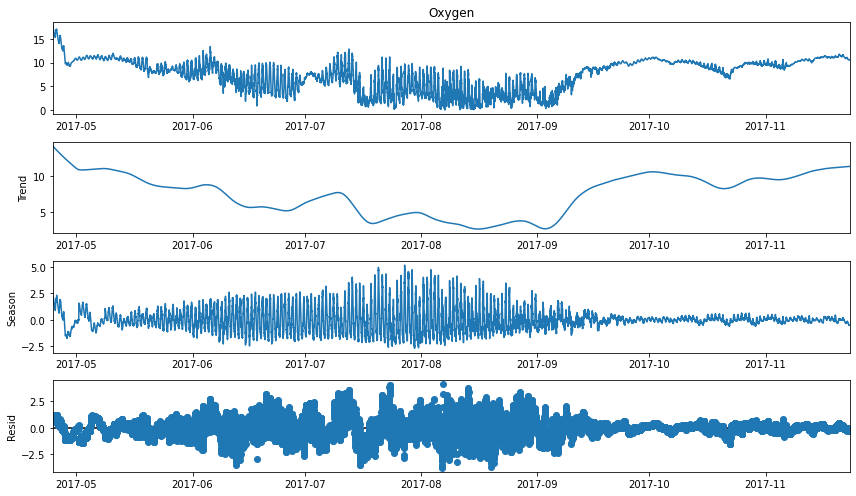

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(cave_data1['Oxygen'], period=96*7)
res = stl.fit()
#fig = plt.figure(figsize=(8, 5))
plt.rc("figure", figsize=(12, 7))
fig = res.plot()

#### Check Residual Closely

#### Dissolved Oxygen

<Figure size 864x432 with 0 Axes>

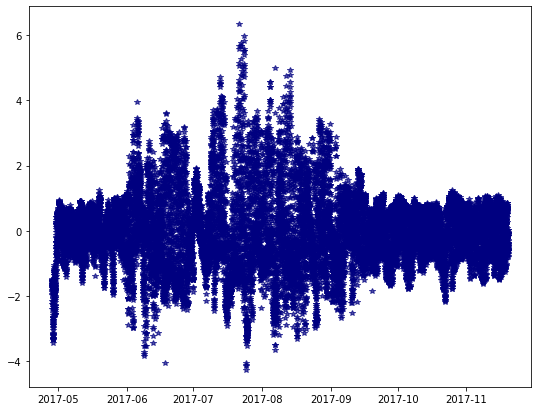

In [ ]:
fig = plt.figure(figsize=(12,6))

import matplotlib.dates as mdates

fig, ax = plt.subplots()
x = decomposed_cave_oxygen1.resid.index
y = decomposed_cave_oxygen1.resid.values 
ax.plot_date(x, y, color='navy',linestyle='None', marker='*', alpha=0.7)
plt.show()

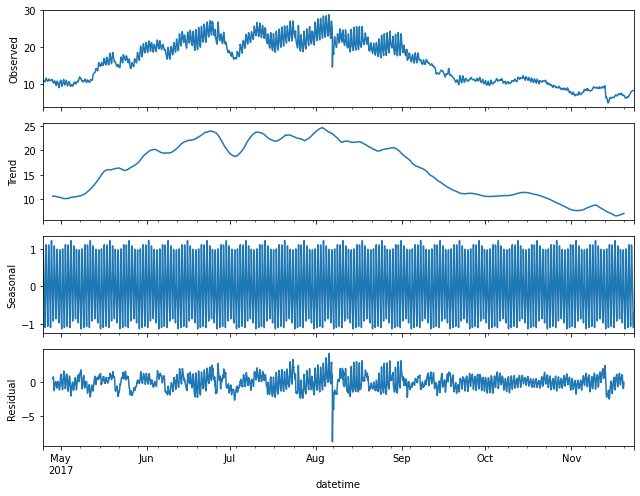

In [ ]:
decomposed_cave_temp1 = sm.tsa.seasonal_decompose(cave_data1['Temp'], freq = 96*7, model='additive')

plt.rcParams["figure.figsize"] = (9, 7)

fig = decomposed_cave_temp1.plot()
plt.show()

#### Check Temperature Residual

<Figure size 864x432 with 0 Axes>

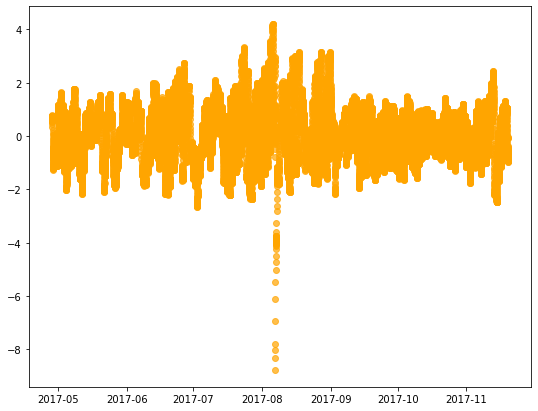

In [ ]:
fig = plt.figure(figsize=(12,6))

fig, ax = plt.subplots()
x = decomposed_cave_temp1.resid.index
y = decomposed_cave_temp1.resid.values 
ax.plot_date(x, y, color='orange',linestyle='None', marker='o', alpha=0.7)
plt.show()

## Include Meteo Data

In [ ]:
data_csv_climate21 = pd.read_csv(path_to_file + 'Climate2021.csv', sep=',')
data_csv_climate21.head(3)

,Date,Daily avg. T [°C],Max. T [°C],Min. T [°C],Min. T at 5cm [°C],Avg. wind [m/s],Cloudiness [%],Avg. rel. hum. [%],Avg. pressure [hPa],Rainfall [mm],Duration of the sun [h],Strong wind,Stormy wind,Rain,Dew,Shower of rain,Storm,Thunder,Lightening
0,2021-03-08 00:00:00,2.0,11.6,-7.5,-8.7,1.3,10.0,58,NaN,0.0,9.2,no,no,no,no,no,no,no,no
1,2021-03-09 00:00:00,3.0,8.3,-0.5,-3.1,4.4,43.0,57,NaN,0.0,8.5,no,no,no,no,no,no,no,no
2,2021-03-10 00:00:00,3.2,9.4,-1.3,-3.4,4.4,20.0,54,NaN,0.0,10.0,no,no,no,no,no,no,no,no


In [ ]:
data_csv_climate17 = pd.read_csv(path_to_file + 'Climate2017.csv', sep=',')
data_csv_climate17.head(3)

,Date,Daily avg. T [°C],Max. T [°C],Min. T [°C],Min. T at 5cm [°C],Avg. wind [m/s],Cloudiness [%],Avg. rel. hum. [%],Avg. pressure [hPa],Rainfall [mm],...,Stormy wind,Rain,Dew,Shower of rain,Storm,Thunder,Lightening,Unnamed: 19,Unnamed: 20,POSTOJNA
0,2017-04-23 00:00:00,8.5,13.7,0.5,-0.5,2.6,37,59,NaN,0.0,...,no,no,no,no,no,no,no,NaN,NaN,lon=14.1932
1,2017-04-24 00:00:00,9.1,12.2,4.8,3.0,2.3,93,78,NaN,0.0,...,no,yes,no,no,no,no,no,NaN,NaN,lat=45.7661
2,2017-04-25 00:00:00,11.1,13.8,8.5,7.6,5.6,100,82,NaN,1.2,...,no,yes,no,no,no,no,no,NaN,NaN,a.s.l.=533m


In [ ]:
data_csv_climate17.dtypes

Date                        object
Daily avg. T [°C]          float64
Max. T [°C]                float64
Min. T [°C]                float64
Min. T at 5cm [°C]         float64
Avg. wind [m/s]            float64
Cloudiness [%]               int64
Avg. rel. hum. [%]           int64
Avg. pressure [hPa]        float64
Rainfall [mm]              float64
Duration of the sun [h]    float64
Strong wind                 object
Stormy wind                 object
Rain                        object
Dew                         object
Shower of rain              object
Storm                       object
Thunder                     object
Lightening                  object
Unnamed: 19                float64
Unnamed: 20                float64
POSTOJNA                    object
dtype: object

In [ ]:
data_csv_climate17['Date'] = pd.to_datetime(data_csv_climate17['Date'])
data_csv_climate17 = data_csv_climate17.set_index('Date') 

In [ ]:
data_csv_climate21['Date'] = pd.to_datetime(data_csv_climate21['Date'])
data_csv_climate21 = data_csv_climate21.set_index('Date') 

In [ ]:
data_csv_climate17.head(3)

,Daily avg. T [°C],Max. T [°C],Min. T [°C],Min. T at 5cm [°C],Avg. wind [m/s],Cloudiness [%],Avg. rel. hum. [%],Avg. pressure [hPa],Rainfall [mm],Duration of the sun [h],...,Stormy wind,Rain,Dew,Shower of rain,Storm,Thunder,Lightening,Unnamed: 19,Unnamed: 20,POSTOJNA
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-23,8.5,13.7,0.5,-0.5,2.6,37,59,NaN,0.0,10.1,...,no,no,no,no,no,no,no,NaN,NaN,lon=14.1932
2017-04-24,9.1,12.2,4.8,3.0,2.3,93,78,NaN,0.0,1.1,...,no,yes,no,no,no,no,no,NaN,NaN,lat=45.7661
2017-04-25,11.1,13.8,8.5,7.6,5.6,100,82,NaN,1.2,2.0,...,no,yes,no,no,no,no,no,NaN,NaN,a.s.l.=533m


In [ ]:
data_csv_climate21.head(3)

,Daily avg. T [°C],Max. T [°C],Min. T [°C],Min. T at 5cm [°C],Avg. wind [m/s],Cloudiness [%],Avg. rel. hum. [%],Avg. pressure [hPa],Rainfall [mm],Duration of the sun [h],Strong wind,Stormy wind,Rain,Dew,Shower of rain,Storm,Thunder,Lightening
Date,,,,,,,,,,,,,,,,,,
2021-03-08,2.0,11.6,-7.5,-8.7,1.3,10.0,58,NaN,0.0,9.2,no,no,no,no,no,no,no,no
2021-03-09,3.0,8.3,-0.5,-3.1,4.4,43.0,57,NaN,0.0,8.5,no,no,no,no,no,no,no,no
2021-03-10,3.2,9.4,-1.3,-3.4,4.4,20.0,54,NaN,0.0,10.0,no,no,no,no,no,no,no,no


In [ ]:
print ('NaNs in every column: \n', data_csv_climate17.isna().sum())

NaNs in every column: 
 Daily avg. T [°C]            0
Max. T [°C]                  0
Min. T [°C]                  0
Min. T at 5cm [°C]           0
Avg. wind [m/s]              0
Cloudiness [%]               0
Avg. rel. hum. [%]           0
Avg. pressure [hPa]        216
Rainfall [mm]                0
Duration of the sun [h]      0
Strong wind                  0
Stormy wind                  0
Rain                         0
Dew                          0
Shower of rain               0
Storm                        0
Thunder                      0
Lightening                   0
Unnamed: 19                216
Unnamed: 20                216
POSTOJNA                   213
dtype: int64


In [ ]:
print ('NaNs in every column: \n', data_csv_climate21.isna().sum())
print ('shape of original dataframe: ', data_csv_climate21.shape)

NaNs in every column: 
 Daily avg. T [°C]            0
Max. T [°C]                  0
Min. T [°C]                  0
Min. T at 5cm [°C]           0
Avg. wind [m/s]              0
Cloudiness [%]               1
Avg. rel. hum. [%]           0
Avg. pressure [hPa]        210
Rainfall [mm]                0
Duration of the sun [h]     31
Strong wind                  0
Stormy wind                  0
Rain                         0
Dew                          0
Shower of rain               0
Storm                        0
Thunder                      0
Lightening                   0
dtype: int64
shape of original dataframe:  (210, 18)


In [ ]:
climate17_data = data_csv_climate17.rename({'Daily avg. T [°C]': 'Daily Avg. T' ,'Cloudiness [%]': 'Cloudy[%]', 'Rainfall [mm]': 'Precipitation[mm]', \
                                            'Avg. rel. hum. [%]': 'Avg. Humidity[%]', 'Duration of the sun [h]' : 'Sun Duration[h]'}, axis=1)
climate17_data.head(3)

,Daily Avg. T,Max. T [°C],Min. T [°C],Min. T at 5cm [°C],Avg. wind [m/s],Cloudy[%],Avg. Humidity[%],Avg. pressure [hPa],Precipitation[mm],Sun Duration[h],...,Stormy wind,Rain,Dew,Shower of rain,Storm,Thunder,Lightening,Unnamed: 19,Unnamed: 20,POSTOJNA
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-23,8.5,13.7,0.5,-0.5,2.6,37,59,NaN,0.0,10.1,...,no,no,no,no,no,no,no,NaN,NaN,lon=14.1932
2017-04-24,9.1,12.2,4.8,3.0,2.3,93,78,NaN,0.0,1.1,...,no,yes,no,no,no,no,no,NaN,NaN,lat=45.7661
2017-04-25,11.1,13.8,8.5,7.6,5.6,100,82,NaN,1.2,2.0,...,no,yes,no,no,no,no,no,NaN,NaN,a.s.l.=533m


In [ ]:
climate21_data = data_csv_climate21.rename({'Daily avg. T [°C]': 'Daily Avg. T' ,'Cloudiness [%]': 'Cloudy[%]', 'Rainfall [mm]': 'Precipitation[mm]', \
                                            'Avg. rel. hum. [%]': 'Avg. Humidity[%]', 'Duration of the sun [h]' : 'Sun Duration[h]'}, axis=1)
climate21_data.head(3)

,Daily Avg. T,Max. T [°C],Min. T [°C],Min. T at 5cm [°C],Avg. wind [m/s],Cloudy[%],Avg. Humidity[%],Avg. pressure [hPa],Precipitation[mm],Sun Duration[h],Strong wind,Stormy wind,Rain,Dew,Shower of rain,Storm,Thunder,Lightening
Date,,,,,,,,,,,,,,,,,,
2021-03-08,2.0,11.6,-7.5,-8.7,1.3,10.0,58,NaN,0.0,9.2,no,no,no,no,no,no,no,no
2021-03-09,3.0,8.3,-0.5,-3.1,4.4,43.0,57,NaN,0.0,8.5,no,no,no,no,no,no,no,no
2021-03-10,3.2,9.4,-1.3,-3.4,4.4,20.0,54,NaN,0.0,10.0,no,no,no,no,no,no,no,no


In [ ]:
print (climate21_data[-3:])

            Daily Avg. T  Max. T [°C]  Min. T [°C]  Min. T at 5cm [°C]  \
Date                                                                     
2021-10-01          11.8         17.9          7.2                 7.0   
2021-10-02          11.2         20.0          8.0                 5.0   
2021-10-03          14.8         17.4          7.0                 5.5   

            Avg. wind [m/s]  Cloudy[%]  Avg. Humidity[%]  Avg. pressure [hPa]  \
Date                                                                            
2021-10-01              4.0       17.0                69                  NaN   
2021-10-02              1.4       27.0                71                  NaN   
2021-10-03              2.6       73.0                78                  NaN   

            Precipitation[mm]  Sun Duration[h] Strong wind Stormy wind Rain  \
Date                                                                          
2021-10-01                0.0              9.7          no       

In [ ]:
climate17_data.drop(['Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)
climate17_data.head(3)

,Daily Avg. T,Max. T [°C],Min. T [°C],Min. T at 5cm [°C],Avg. wind [m/s],Cloudy[%],Avg. Humidity[%],Avg. pressure [hPa],Precipitation[mm],Sun Duration[h],Strong wind,Stormy wind,Rain,Dew,Shower of rain,Storm,Thunder,Lightening,POSTOJNA
Date,,,,,,,,,,,,,,,,,,,
2017-04-23,8.5,13.7,0.5,-0.5,2.6,37,59,NaN,0.0,10.1,no,no,no,no,no,no,no,no,lon=14.1932
2017-04-24,9.1,12.2,4.8,3.0,2.3,93,78,NaN,0.0,1.1,no,no,yes,no,no,no,no,no,lat=45.7661
2017-04-25,11.1,13.8,8.5,7.6,5.6,100,82,NaN,1.2,2.0,yes,no,yes,no,no,no,no,no,a.s.l.=533m


In [ ]:
print (climate17_data.columns)
print (climate17_data.shape)

Index(['Daily Avg. T', 'Max. T [°C]', 'Min. T [°C]', 'Min. T at 5cm [°C]',
       'Avg. wind [m/s]', 'Cloudy[%]', 'Avg. Humidity[%]',
       'Avg. pressure [hPa]', 'Rain[mm]', 'Sun Duration[h]', 'Strong wind',
       'Stormy wind', 'Rain', 'Dew', 'Shower of rain', 'Storm', 'Thunder',
       'Lightening', 'POSTOJNA'],
      dtype='object')
(216, 19)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7206b5550>,
      dtype=object)

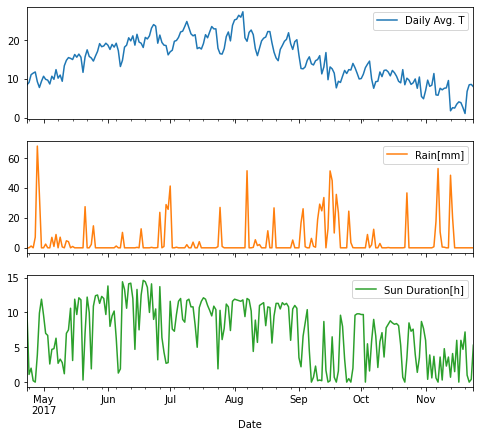

In [ ]:
climate17_data[['Daily Avg. T', 'Rain[mm]', 'Sun Duration[h]']].plot(subplots=True, figsize=(8,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff72007b350>,
      dtype=object)

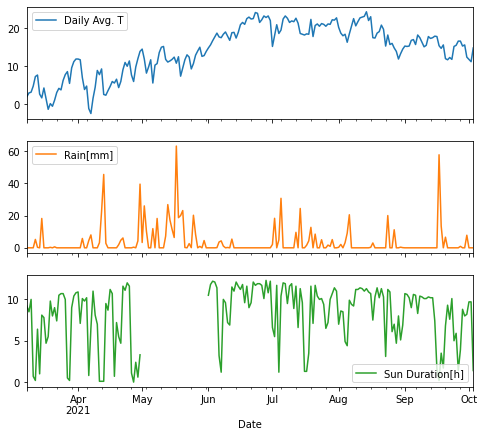

In [ ]:
climate21_data[['Daily Avg. T', 'Rain[mm]', 'Sun Duration[h]']].plot(subplots=True, figsize=(8,7))

Date
2017-04-23    0.0
2017-04-24    0.0
2017-04-25    1.2
2017-04-26    0.0
2017-04-27    7.1
             ... 
2017-11-20    0.0
2017-11-21    0.0
2017-11-22    0.0
2017-11-23    0.0
2017-11-24    0.0
Name: Precipitation[mm], Length: 216, dtype: float64
DatetimeIndex(['2017-04-23', '2017-04-24', '2017-04-25', '2017-04-26',
               '2017-04-27', '2017-04-28', '2017-04-29', '2017-04-30',
               '2017-05-01', '2017-05-02',
               ...
               '2017-11-15', '2017-11-16', '2017-11-17', '2017-11-18',
               '2017-11-19', '2017-11-20', '2017-11-21', '2017-11-22',
               '2017-11-23', '2017-11-24'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)
[736450. 736481. 736511. 736542. 736573. 736603. 736634. 736664.]


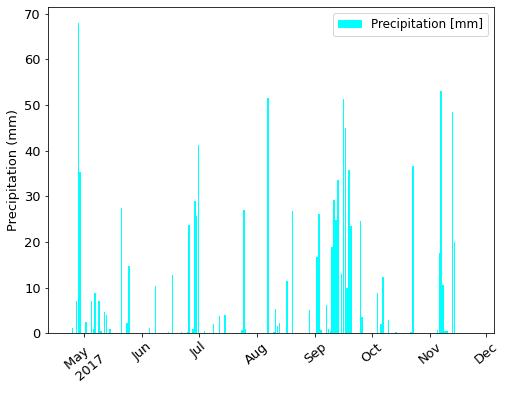

In [ ]:
print(climate17_data['Precipitation[mm]'])
print (climate17_data['Precipitation[mm]'].index)

fig = plt.figure(figsize=(8, 6))
b = plt.bar(climate17_data['Precipitation[mm]'].index, climate17_data['Precipitation[mm]'], label='Precipitation [mm]', 
            color='cyan')
#plt.xlabel('Date-Time', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=13)
plt.legend(fontsize=12)
labels = ['May \n 2017', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#ticks = ['2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-10-01', '2017-11-01', '2017-12-01']
get_ticks = [736450., 736481., 736511., 736542., 736573., 736603., 736634., 736664.]
plt.xticks(get_ticks, labels, rotation=40, fontsize=13)
#plt.xticks(rotation=40, fontsize=13)
plt.yticks(fontsize=13)
print (plt.gca().get_xticks())
# plt.savefig(path_to_file + 'plots/Precip2017_full_bar.png', dpi=300)
# fig = climate17_data[['Rain[mm]']].plot(figsize=(7, 5), kind='bar')
# plt.bar(climate17_data.index, climate17_data[['Rain[mm]']])
# plt.xlabel('Date-Time', fontsize=12)

# plt.show()

[737850. 737881. 737911. 737942. 737972. 738003. 738034. 738064.]


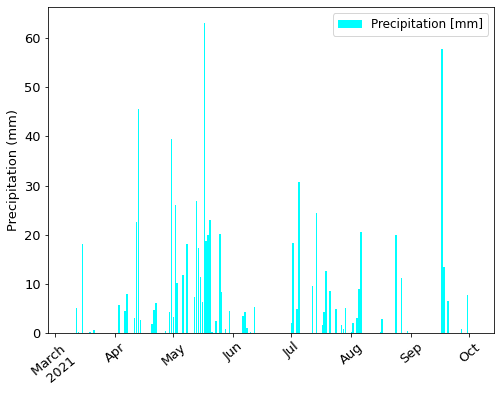

In [ ]:
fig = plt.figure(figsize=(8, 6))
b = plt.bar(climate21_data['Precipitation[mm]'].index, climate21_data['Precipitation[mm]'], label='Precipitation [mm]', 
            color='cyan')
#plt.xlabel('Date-Time', fontsize=12)
plt.legend(fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=13)
get_xticks = [737850., 737881., 737911., 737942., 737972., 738003., 738034., 738064.]
labels = ['March \n 2021', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
plt.xticks(get_xticks, labels, rotation=40, fontsize=13)
plt.yticks(fontsize=13)
print(plt.gca().get_xticks())
# plt.savefig(path_to_file + 'plots/Precip2021_full_bar.png', dpi=300)

## Dissolved Oxygen vs River Temp (2021)

In [ ]:
path_to_file = '/content/drive/My Drive/Colab Notebooks/Cave_Data/'

data_csv_2021 = pd.read_csv(path_to_file + 'OxygenandTemp_2021.csv', sep=',', parse_dates=[['Date', 'Time']])
data_csv_2021.head(3)

,Date_Time,DO (mg/L),Temp (°C)
0,2021-03-08 11:00:00,14.42,5.32
1,2021-03-08 11:15:00,14.47,5.40
2,2021-03-08 11:30:00,14.58,5.48


In [ ]:
cave_data2021 = data_csv_2021.rename({'Date_Time': 'datetime' ,'DO (mg/L)': 'Oxygen', 'Temp (°C)': 'Temp'}, axis=1)

cave_data2021['datetime'] = pd.to_datetime(cave_data2021['datetime'])
cave_data2021 = cave_data2021.set_index('datetime') 

print(cave_data2021.head(5))
print ('\n')
print ('cave data shape: ', cave_data2021.shape)

                     Oxygen  Temp
datetime                         
2021-03-08 11:00:00   14.42  5.32
2021-03-08 11:15:00   14.47  5.40
2021-03-08 11:30:00   14.58  5.48
2021-03-08 11:45:00   14.65  5.54
2021-03-08 12:00:00   14.61  5.62


cave data shape:  (19967, 2)


select dataframe shape:  (14593, 2)


Text(0.5, 0, '')

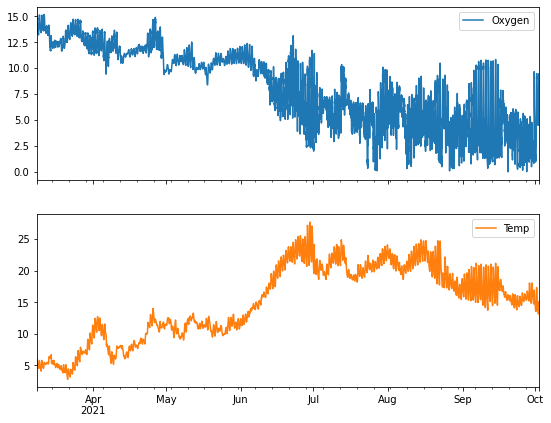

In [ ]:
cave_data2021_may_sept = cave_data2021["2021-05-01 15:00:00": "2021-09-30 15:00:00"]
print ('select dataframe shape: ', cave_data2021_may_sept.shape)

fig, ax = cave_data2021.plot(subplots=True, figsize=(9, 7))
ax.set_xlabel('', fontsize=12)

(76, 2)


Text(0.5, 0, '')

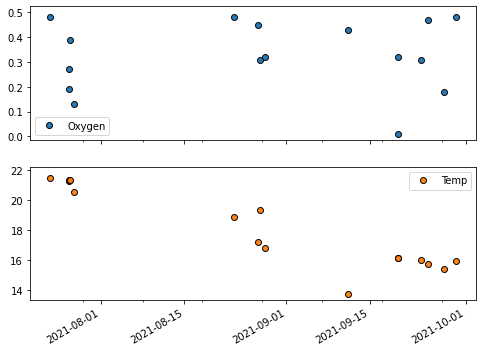

In [ ]:
cave_data2021_may_sept_O2_0_0d5 = cave_data2021_may_sept[(cave_data2021_may_sept['Oxygen'] >= 0.01) & (cave_data2021_may_sept['Oxygen'] <= 0.5)]

print (cave_data2021_may_sept_O2_0_0d5.shape)

fig, ax = cave_data2021_may_sept_O2_0_0d5.plot(subplots=True, figsize=(8, 6), linestyle='None', 
                                            markevery=5, marker='o', 
                                            markeredgecolor='black', alpha=0.96)
ax.set_xlabel('', fontsize=12)

In [ ]:
len(cave_data2021_may_sept_O2_0_0d5)

76

In [ ]:
cave_data2021_may_sept_O2_0_0d5.iloc[::5, :]

,Oxygen,Temp
datetime,,
2021-07-23 13:45:00,0.48,21.50
2021-07-26 16:15:00,0.19,21.28
2021-07-26 17:30:00,0.27,21.38
2021-07-26 19:15:00,0.39,21.38
2021-07-27 12:15:00,0.13,20.58
2021-08-23 06:45:00,0.48,18.90
2021-08-27 07:45:00,0.45,17.18
2021-08-27 16:30:00,0.31,19.36
2021-08-28 09:30:00,0.32,16.78


(array([ 8.,  0., 20.,  9.,  4.,  3.,  4.,  3.,  6., 19.]),
 array([13.72 , 14.532, 15.344, 16.156, 16.968, 17.78 , 18.592, 19.404,
        20.216, 21.028, 21.84 ]),
 <a list of 10 Patch objects>)

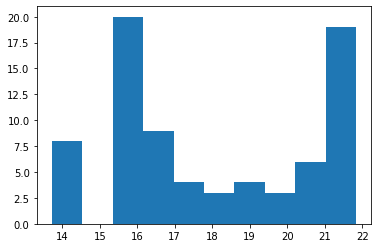

In [ ]:
plt.hist(cave_data2021_may_sept_O2_0_0d5['Temp'])

#### Oxygen Decomposition

In [ ]:
decomposed_cave_oxygen2021 = sm.tsa.seasonal_decompose(cave_data2021['Oxygen'], period = 96*7, model='additive', ) 

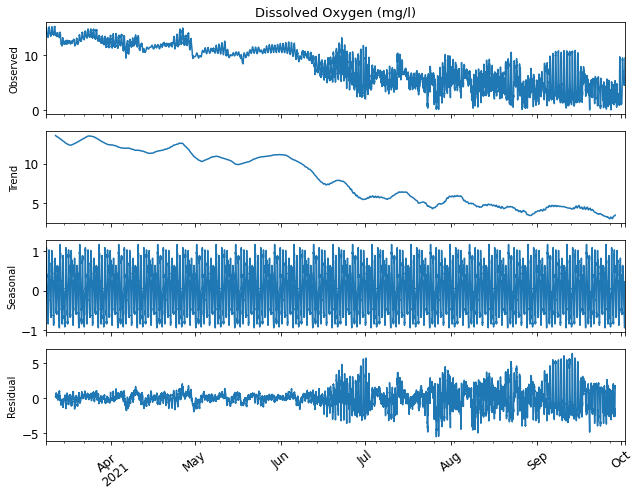

In [ ]:
fig, ax = plt.subplots(4, figsize=(9, 7), sharex=True)

decomposed_cave_oxygen2021.observed.plot(ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('Observed', fontsize=10)
ax[0].set_title('Dissolved Oxygen (mg/l)', fontsize=13)
ax[0].tick_params(axis='y', which='major', labelsize=12)
decomposed_cave_oxygen2021.trend.plot(ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('Trend', fontsize=10)
ax[1].tick_params(axis='y', which='major', labelsize=12)
decomposed_cave_oxygen2021.seasonal.plot(ax=ax[2])
ax[2].set_xlabel('')
ax[2].set_ylabel('Seasonal', fontsize=10)
ax[2].tick_params(axis='y', which='major', labelsize=12)
decomposed_cave_oxygen2021.resid.plot(ax=ax[3])
ax[3].set_xlabel('')
ax[3].set_ylabel('Residual', fontsize=10)
ax[3].tick_params(axis='y', which='major', labelsize=12)
ax[3].tick_params(axis='x', which='major', labelsize=12, rotation=39)
plt.tight_layout()
# plt.savefig(path_to_file + '/plots/seasonal_decomp_O2_2021_final.png', dpi=300)
plt.show()

### Comparison of River Temp vs Air Temp

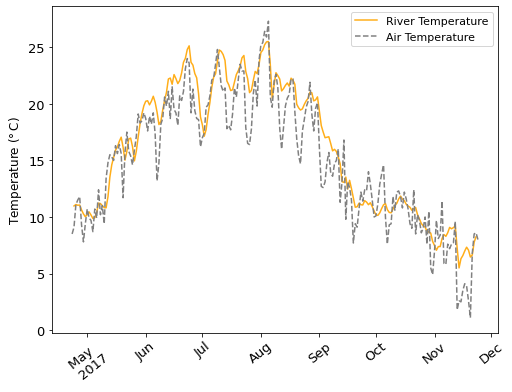

[736450. 736481. 736511. 736542. 736573. 736603. 736634. 736664.]


In [ ]:
resampled_temp17_meteo = climate17_data["Daily Avg. T"].resample("D").mean() # daily samples
resampled_sun_duration_meteo = climate17_data["Sun Duration[h]"].resample("D").mean()
resampled_rain_meteo = climate17_data["Precipitation[mm]"].resample("D").mean()
resampled_rain_meteo_weekly = climate17_data["Precipitation[mm]"].resample("W").mean()

ax_get_xticks_temp =  [736450., 736481., 736511., 736542., 736573., 736603., 736634., 736664.]
ax_get_labels = ['May \n 2017', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize=(8, 6))
ax = sns.lineplot(data = resampled_temp1, label='River Temperature', color='orange', alpha=0.9)
ax = sns.lineplot(data = resampled_temp17_meteo, label='Air Temperature', linestyle='--', alpha=1.0, color='gray')
ax.set_xlabel('', )
ax.set_ylabel(r'Temperature $(\degree \, \mathrm{C})$', fontsize=12)
plt.xticks(ax_get_xticks_temp, ax_get_labels, fontsize=13, rotation=39)
plt.yticks(fontsize=13)
plt.legend(fontsize=11)
#fig.suptitle('Comparison of River Temperature with Air Temperature', fontsize=12)
# plt.savefig(path_to_file + 'plots/Temp_from_Cave_Meteo.png', dpi=300)
plt.show()

print (ax.get_xticks())

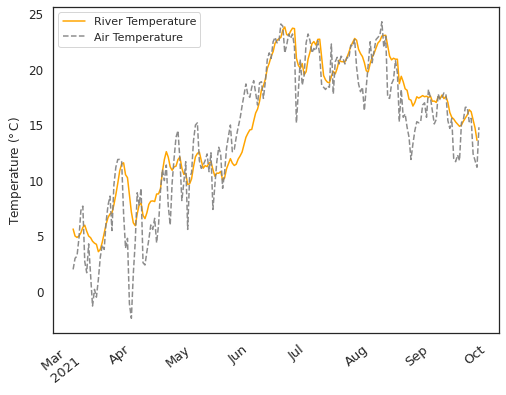

[737850. 737881. 737911. 737942. 737972. 738003. 738034. 738064.]


In [ ]:
resampled_temp21 = cave_data2021["Temp"].resample("D").mean()
resampled_oxygen21 = cave_data2021["Oxygen"].resample("D").mean()
resampled_temp21_meteo = climate21_data["Daily Avg. T"].resample("D").mean() # daily samples
resampled_sun_duration_meteo21 = climate21_data["Sun Duration[h]"].resample("D").mean()
resampled_rain_meteo21 = climate21_data["Precipitation[mm]"].resample("D").mean()
resampled_rain_meteo21_weekly = climate21_data["Precipitation[mm]"].resample("W").mean()

get_x_ticks = [737850., 737881., 737911., 737942., 737972., 738003., 738034., 738064.]
get_x_labels = ['Mar \n 2021', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

fig = plt.figure(figsize=(8, 6))
ax = sns.lineplot(data = resampled_temp21, label='River Temperature', color='orange')
ax = sns.lineplot(data = resampled_temp21_meteo, label='Air Temperature', linestyle='--', alpha=0.9, color='gray')
ax.set_xlabel('', )
ax.set_ylabel(r'Temperature $(\degree \, \mathrm{C})$', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(get_x_ticks, get_x_labels, fontsize=13, rotation=39)
plt.legend(fontsize=11)
#fig.suptitle('Comparison of River Temperature Measured with Air Temperature', fontsize=12)
# plt.savefig(path_to_file + 'plots/Temp_from_Cave_Meteo21.png', dpi=200)
plt.show()

print (ax.get_xticks())

<Figure size 576x432 with 0 Axes>

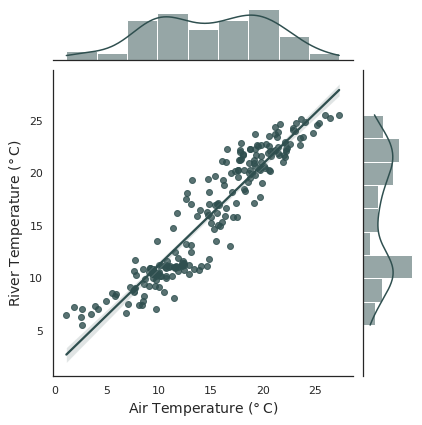

In [ ]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')

fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_temp17_meteo, y=resampled_temp1, kind="reg", color="darkslategray")
ax.set_axis_labels(r'Air Temperature $(\degree \, \mathrm{C})$', r'River Temperature $(\degree \,  \mathrm{C})$', fontsize=14)
#plt.savefig(path_to_file + 'plots/Temp_from_Cave_Meteo_reg.png', dpi=300)
plt.show()

In [ ]:
from scipy import  stats


resampled_temp17_meteo_2 = resampled_temp17_meteo[:-2]
resampled_temp21_meteo_1 = resampled_temp21_meteo[:-1]
print (len(resampled_temp17_meteo_2), len(resampled_temp1))
print (len(resampled_temp21_meteo_1), len(resampled_temp21))


r, p = stats.pearsonr(resampled_temp17_meteo_2, resampled_temp1)
print ('r, and p: ', r, p)

r21, p21 = stats.pearsonr(resampled_temp21_meteo_1, resampled_temp21)
print ('r, and p: ', r21, p21)


214 214
209 209
r, and p:  0.9504614981903817 1.5087426358513756e-109
r, and p:  0.9304331405114903 3.37551310191829e-92


[Text(0, 0.5, 'River Temp'), Text(0.5, 0, 'Air Temp')]

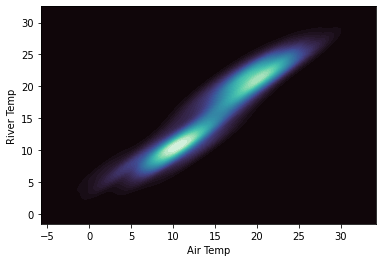

In [ ]:
ax = sns.kdeplot(x=resampled_temp17_meteo, y=resampled_temp1, fill=True, thresh=0, levels=50, cmap='mako')

ax.set(xlabel='Air Temp', ylabel='River Temp')

<Figure size 576x432 with 0 Axes>

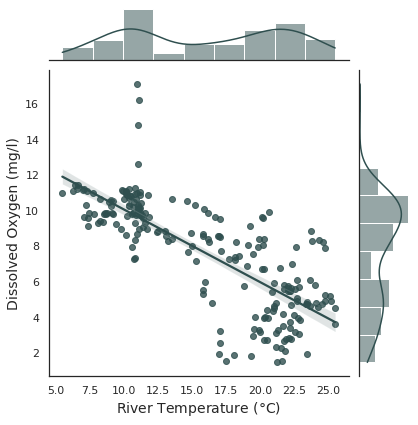

In [ ]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')
fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_temp1, y=resampled_oxygen1, kind="reg", color="darkslategray")
ax.set_axis_labels(r'River Temperature $(\degree \mathrm{C})$ ', r'Dissolved Oxygen (mg/l)', fontsize=14, )
#ax.fig.suptitle('Regression Plot', fontsize=14)
#plt.savefig(path_to_file + 'plots/Temp_from_Cave_O2_reg.png', dpi=300)
plt.show()

In [ ]:
print (len(resampled_temp1), len(resampled_oxygen1))

r, p = stats.pearsonr(resampled_temp1, resampled_oxygen1)

print ('o2 temp r, and p: ', r, p)

214 214
o2 temp r, and p:  -0.7695761921212367 3.5699603176395276e-43


<Figure size 576x432 with 0 Axes>

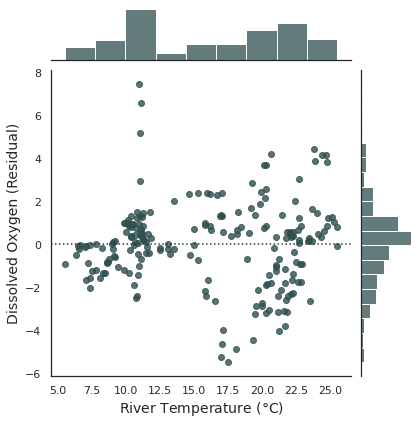

In [ ]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')
fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_temp1, y=resampled_oxygen1,  kind='resid', color="darkslategray")
ax.set_axis_labels(r'River Temperature $(\degree \mathrm{C})$', r'Dissolved Oxygen (Residual)', fontsize=14)
# ax.fig.suptitle('Residual Plot', fontsize=14)
#plt.savefig(path_to_file + 'plots/Temp_from_Cave_O2_resid.png', dpi=300)
plt.show()

<Figure size 576x432 with 0 Axes>

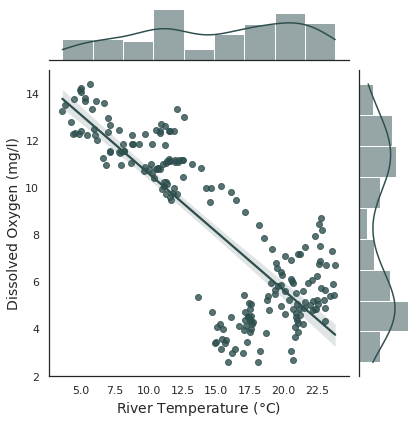

In [ ]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')
fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_temp21, y=resampled_oxygen21, kind="reg", color="darkslategray")
ax.set_axis_labels(r'River Temperature $(\degree \mathrm{C})$', r'Dissolved Oxygen (mg/l)', fontsize=14)
# ax.fig.suptitle('Regression Plot', fontsize=14)
# plt.savefig(path_to_file + 'plots/Temp_from_Cave_O2_reg_21.png', dpi=300)
plt.show()

<Figure size 576x432 with 0 Axes>

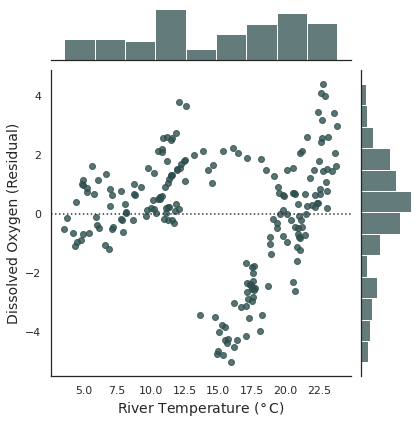

In [ ]:
fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_temp21, y=resampled_oxygen21,  kind='resid', color="darkslategray")
ax.set_axis_labels(r'River Temperature $(\degree \, \mathrm{C})$ ', r'Dissolved Oxygen (Residual)', fontsize=14)
# ax.fig.suptitle('Residual Plot', fontsize=14)
#fig.suptitle('Residual Plot')
# plt.savefig(path_to_file + 'plots/Temp_from_Cave_O2_resid_21.png', dpi=300)
plt.show()

In [ ]:
print (len(resampled_temp21), len(resampled_oxygen21))

r21, p21 = stats.pearsonr(resampled_temp21, resampled_oxygen21)

print ('o2 temp r, and p: ', r21, p21)

209 209
o2 temp r, and p:  -0.8219918078054096 1.6393226317755044e-52


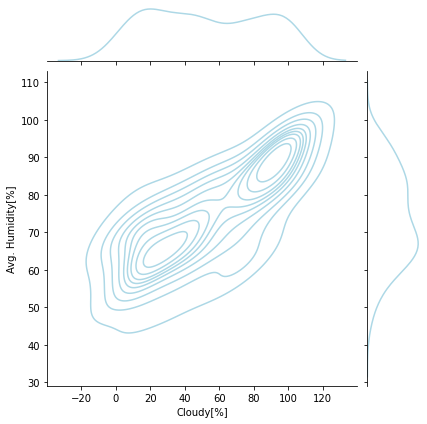

In [ ]:
ax = sns.jointplot(data=climate17_data, x = "Cloudy[%]", y = "Avg. Humidity[%]", kind="kde", color="lightblue")

<Figure size 648x432 with 0 Axes>

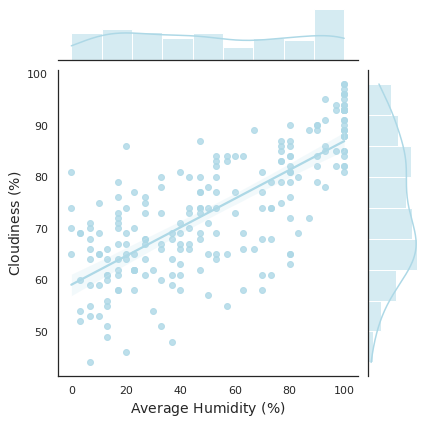

In [ ]:
fig=plt.figure(figsize=(9, 6))
ax = sns.jointplot(data=climate17_data, x = "Cloudy[%]", y = "Avg. Humidity[%]", kind="reg", color="lightblue")
ax.set_axis_labels(r'Average Humidity $(\%)$', r'Cloudiness $(\%)$', fontsize=14)
#ax.fig.suptitle('Regression Plot', fontsize=14)
# plt.savefig(path_to_file + 'plots/Cloud_Humidity_reg_2017.png', dpi=300)
plt.show()

<Figure size 648x432 with 0 Axes>

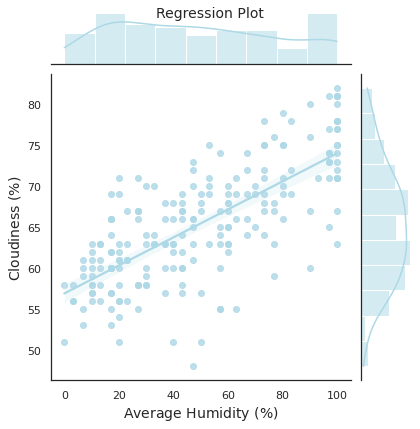

In [ ]:
fig=plt.figure(figsize=(9, 6))
ax = sns.jointplot(data=climate21_data, x = "Cloudy[%]", y = "Avg. Humidity[%]", kind="reg", color="lightblue")
ax.set_axis_labels(r'Average Humidity $(\%)$', r'Cloudiness $(\%)$', fontsize=14)
ax.fig.suptitle('Regression Plot', fontsize=14)
# plt.savefig(path_to_file + 'plots/Cloud_Humidity_reg_2021.png', dpi=300)
plt.show()

## Check Water Level Data

In [ ]:
data_csv_waterlevel17 = pd.read_csv(path_to_file + 'WaterLevel1718.csv', sep=',')
data_csv_waterlevel17.head(3)

,Date/Time,Water level (cm)
0,2017-04-01 00:00:00,97
1,2017-04-01 00:30:00,97
2,2017-04-01 01:00:00,97


In [ ]:
data_csv_waterlevel21 = pd.read_csv(path_to_file + 'WaterLevel2021.csv', sep=',')
data_csv_waterlevel21.head(3)

,Date/Time,Water level (cm)
0,2021-03-08 00:00:00,99
1,2021-03-08 00:30:00,99
2,2021-03-08 01:00:00,99


In [ ]:
waterlevel_data1718 = data_csv_waterlevel17.rename({'Date/Time': 'datetime' , 'Water level (cm)': 'Water Level (cm)'}, axis=1)
waterlevel_data1718.head(3)

,datetime,Water Level (cm)
0,2017-04-01 00:00:00,97
1,2017-04-01 00:30:00,97
2,2017-04-01 01:00:00,97


In [ ]:
waterlevel_data21 = data_csv_waterlevel21.rename({'Date/Time': 'datetime' , 'Water level (cm)': 'Water Level (cm)'}, axis=1)
waterlevel_data21.head(3)

,datetime,Water Level (cm)
0,2021-03-08 00:00:00,99
1,2021-03-08 00:30:00,99
2,2021-03-08 01:00:00,99


In [ ]:
waterlevel_data1718['datetime'] = pd.to_datetime(waterlevel_data1718['datetime'])
waterlevel_data1718 = waterlevel_data1718.set_index('datetime') 
waterlevel_data1718.head(3)

,Water Level (cm)
datetime,
2017-04-01 00:00:00,97
2017-04-01 00:30:00,97
2017-04-01 01:00:00,97


In [ ]:
waterlevel_data17only = waterlevel_data1718["2017-04-01 15:00:00": "2017-12-01 15:00:00"] # cave_data1["2017-05-01 15:00:00": "2017-09-30 15:00:00"]
waterlevel_data17only.head(3)

,Water Level (cm)
datetime,
2017-04-01 15:00:00,97
2017-04-01 15:30:00,97
2017-04-01 16:00:00,97


In [ ]:
waterlevel_data21['datetime'] = pd.to_datetime(waterlevel_data21['datetime'])
waterlevel_data21 = waterlevel_data21.set_index('datetime') 
waterlevel_data21.head(3)

,Water Level (cm)
datetime,
2021-03-08 00:00:00,99
2021-03-08 00:30:00,99
2021-03-08 01:00:00,99


In [ ]:
print ('NaNs in every column: \n', waterlevel_data1718.isna().sum())

NaNs in every column: 
 Water Level (cm)    0
dtype: int64


In [ ]:
print ('NaNs in every column: \n', waterlevel_data21.isna().sum())
print ('shape of waterlevel 21 data: ', waterlevel_data21.shape)
print ('dtypes of waterlevel 21 data: ', waterlevel_data21.dtypes)

NaNs in every column: 
 Water Level (cm)    779
dtype: int64
shape of waterlevel 21 data:  (9984, 1)
dtypes of waterlevel 21 data:  Water Level (cm)    object
dtype: object


In [ ]:
waterlevel_data21 = waterlevel_data21[waterlevel_data21['Water Level (cm)'].str.contains('-')==False]
print ('shape now: ', waterlevel_data21.shape)

shape now:  (9179, 1)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7704db6f90>],
      dtype=object)

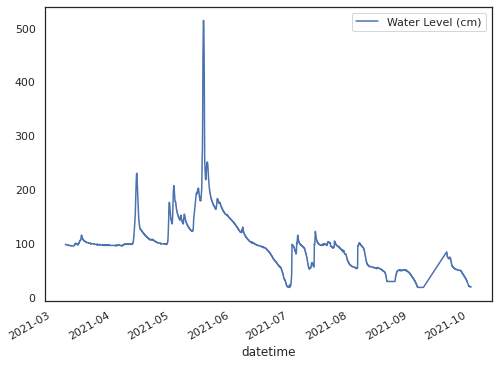

In [ ]:
waterlevel_data21['Water Level (cm)']=waterlevel_data21['Water Level (cm)'].astype(float)
waterlevel_data21.plot(subplots=True, figsize=(8,6))

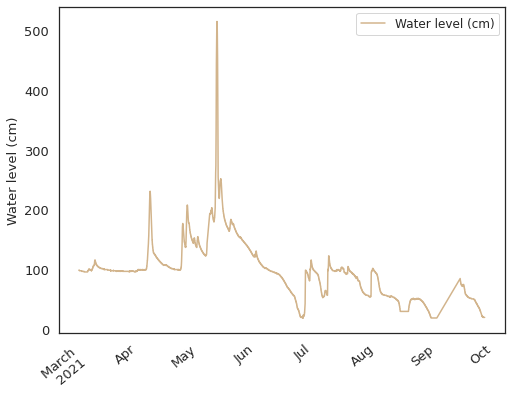

[737850. 737881. 737911. 737942. 737972. 738003. 738034. 738064.]


In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 6))
wl_21 = waterlevel_data21.plot(subplots=True, ax=ax, color='Tan')
plt.xlabel('')
plt.legend(['Water level (cm)'], fontsize=12)
plt.ylabel('Water level (cm)', fontsize=13)
get_xticks = [737850., 737881., 737911., 737942., 737972., 738003., 738034., 738064.]
xlabels = ['March \n 2021', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
plt.xticks(get_xticks, xlabels, rotation=40, fontsize=13)
plt.yticks(fontsize=13)
# plt.savefig(path_to_file + 'plots/WaterLevel2021_full.png', dpi=300)
plt.show()
print(ax.get_xticks())

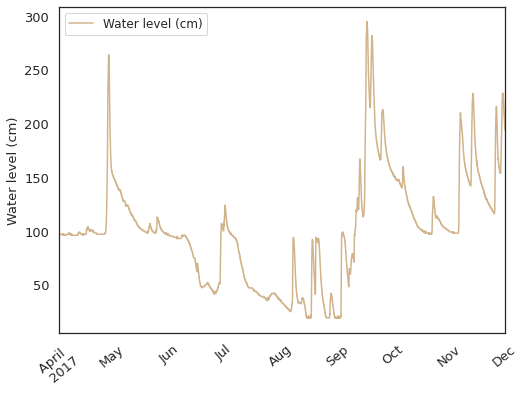

[24850980 24893280 24937920 24981120 25025760 25070400 25113600 25158240
 25201440]


In [ ]:
fig, ax1 = plt.subplots(1, figsize=(8, 6))
wl_17 = waterlevel_data17only.plot(subplots=True, ax=ax1, color='Tan')
plt.xlabel('')
plt.legend(['Water level (cm)'], fontsize=12)
plt.ylabel('Water level (cm)', fontsize=13)
get_xticks = [24850980, 24893280, 24937920, 24981120, 25025760, 25070400, 25113600, 25158240, 25201440]
xlabels = ['April \n 2017', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(get_xticks, xlabels, rotation=40, fontsize=13)
plt.yticks(fontsize=13)
# plt.savefig(path_to_file + 'plots/WaterLevel2017_full.png', dpi=300)
plt.show()
print(ax1.get_xticks())

In [ ]:
waterlevel_data21_nonan = waterlevel_data21.dropna()
print ('shape of nonan dataframe: ', waterlevel_data21_nonan)

shape of nonan dataframe:                       Water Level (cm)
datetime                             
2021-03-08 00:00:00              99.0
2021-03-08 00:30:00              99.0
2021-03-08 01:00:00              99.0
2021-03-08 01:30:00              99.0
2021-03-08 02:00:00              99.0
...                               ...
2021-10-02 22:00:00              20.0
2021-10-02 22:30:00              20.0
2021-10-02 23:00:00              20.0
2021-10-02 23:30:00              20.0
2021-10-03 00:00:00              20.0

[9179 rows x 1 columns]


In [ ]:
waterlevel_data17 =  waterlevel_data1718.loc['2017-04-01 00:00:00':'2017-11-24 00:00:00']

waterlevel_data17.head(3)

,Water Level (cm)
datetime,
2017-04-01 00:00:00,97
2017-04-01 00:30:00,97
2017-04-01 01:00:00,97


In [ ]:
waterlevel_data21_nonan_loc =  waterlevel_data21_nonan.loc['2021-04-01 00:00:00':'2021-11-24 00:00:00']

waterlevel_data21_nonan_loc.head(3)

,Water Level (cm)
datetime,
2021-04-01 00:00:00,97.0
2021-04-01 00:30:00,97.0
2021-04-01 01:00:00,97.0


In [ ]:
resampled_waterlevel_17 = waterlevel_data17["Water Level (cm)"].resample("D").mean()
resampled_waterlevel_17_weekly = waterlevel_data17["Water Level (cm)"].resample("W").mean()

resampled_waterlevel_21 = waterlevel_data21_nonan_loc["Water Level (cm)"].resample("D").mean()
resampled_waterlevel_21_weekly = waterlevel_data21_nonan_loc["Water Level (cm)"].resample("W").mean()

In [ ]:
resampled_waterlevel_17

datetime
2017-04-01     97.000000
2017-04-02     97.000000
2017-04-03     96.937500
2017-04-04     96.083333
2017-04-05     96.020833
                 ...    
2017-11-20    134.125000
2017-11-21    129.708333
2017-11-22    125.979167
2017-11-23    122.708333
2017-11-24    121.000000
Freq: D, Name: Water Level (cm), Length: 238, dtype: float64

In [ ]:
print ('max & min of water level: ', waterlevel_data17['Water Level (cm)'].max(), waterlevel_data17['Water Level (cm)'].min())

max & min of water level:  295 19


In [ ]:
print (resampled_rain_meteo)
resampled_rain_meteo_nonzero = resampled_rain_meteo[resampled_rain_meteo!=0]
resampled_rain_meteo_weekly_nonzero = resampled_rain_meteo_weekly[resampled_rain_meteo_weekly !=0]
print (resampled_rain_meteo_nonzero)

Date
2017-04-23    0.0
2017-04-24    0.0
2017-04-25    1.2
2017-04-26    0.0
2017-04-27    7.1
             ... 
2017-11-20    0.0
2017-11-21    0.0
2017-11-22    0.0
2017-11-23    0.0
2017-11-24    0.0
Freq: D, Name: Precipitation[mm], Length: 216, dtype: float64
Date
2017-04-25     1.2
2017-04-27     7.1
2017-04-28    68.0
2017-04-29    35.4
2017-05-02     2.5
              ... 
2017-11-08    10.6
2017-11-09     0.5
2017-11-10     0.4
2017-11-13    48.5
2017-11-14    20.0
Name: Precipitation[mm], Length: 77, dtype: float64


In [ ]:
print (resampled_rain_meteo21)
resampled_rain_meteo21_nonzero = resampled_rain_meteo21[resampled_rain_meteo21!=0]
resampled_rain_meteo21_weekly_nonzero = resampled_rain_meteo21_weekly[resampled_rain_meteo21_weekly !=0]
print (resampled_rain_meteo21_nonzero)

Date
2021-03-08    0.0
2021-03-09    0.0
2021-03-10    0.0
2021-03-11    0.0
2021-03-12    5.2
             ... 
2021-09-29    0.0
2021-09-30    7.8
2021-10-01    0.0
2021-10-02    0.0
2021-10-03    0.0
Freq: D, Name: Precipitation[mm], Length: 210, dtype: float64
Date
2021-03-12     5.2
2021-03-13     0.3
2021-03-15    18.2
2021-03-19     0.3
2021-03-21     0.6
              ... 
2021-09-17    57.7
2021-09-18    13.5
2021-09-20     6.6
2021-09-27     0.9
2021-09-30     7.8
Name: Precipitation[mm], Length: 75, dtype: float64


<Figure size 576x432 with 0 Axes>

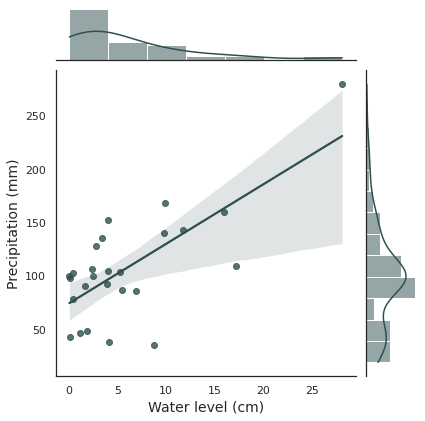

In [ ]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')
fig = plt.figure(1, figsize=(8, 6))
joint_p = sns.jointplot(x=resampled_rain_meteo_weekly_nonzero, y=resampled_waterlevel_17, kind="reg", color="darkslategray",)
joint_p.set_axis_labels(r'Water level (cm)',  r'Precipitation (mm)', fontsize=14)

#ax.fig.suptitle('Regression Plot', fontsize=14)
#plt.savefig(path_to_file + 'plots/precip_Waterlevel2017.png', dpi=300)
#plt.yticks(fontsize=22)
plt.show()

In [ ]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')
fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_rain_meteo_nonzero, y=resampled_waterlevel_17, kind="reg", color="darkslategray")
ax.set_axis_labels(r'Water level (cm)',  r'Precipitation (mm)', fontsize=14)
# ax.fig.suptitle('Regression Plot', fontsize=14)
#   plt.savefig(path_to_file + 'plots/Rain_Waterlevel2017_Daily.png', dpi=300)
plt.show()

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

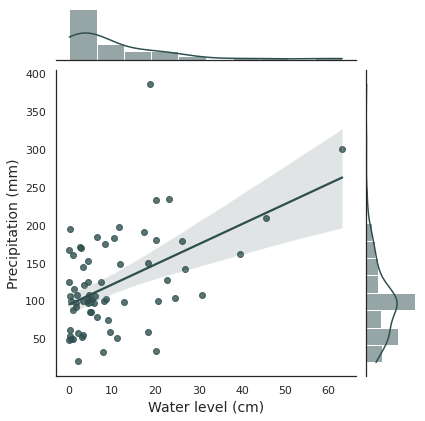

In [71]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')
fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_rain_meteo21_nonzero, y=resampled_waterlevel_21, kind="reg", color="darkslategray")
ax.set_axis_labels(r'Water level (cm)',  r'Precipitation (mm)', fontsize=14)
# ax.fig.suptitle('Regression Plot', fontsize=14)
# plt.savefig(path_to_file + 'plots/Rain_Waterlevel2021_Daily.png', dpi=300)
plt.show()

<Figure size 648x432 with 0 Axes>

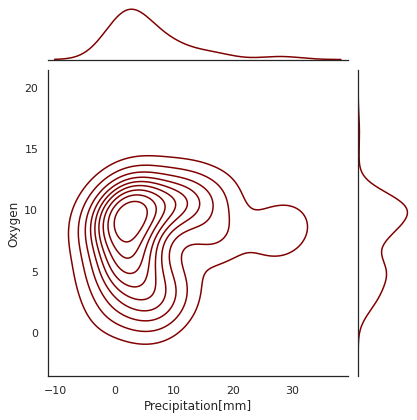

In [73]:
fig=plt.figure(figsize=(9, 6))
sns.jointplot(x=resampled_rain_meteo_weekly_nonzero, y=resampled_oxygen1, kind="kde", color="maroon")

<Figure size 576x432 with 0 Axes>

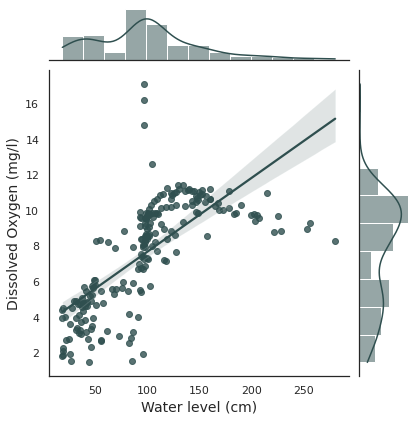

In [72]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')

fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_waterlevel_17, y=resampled_oxygen1, kind="reg", color="darkslategray")
ax.set_axis_labels(r'Water level (cm)',  r'Dissolved Oxygen (mg/l)', fontsize=14)
# ax.fig.suptitle('Regression Plot', fontsize=14)
# plt.savefig(path_to_file + 'plots/Oxyen_Waterlevel2017.png', dpi=300)
plt.show()

<Figure size 576x432 with 0 Axes>

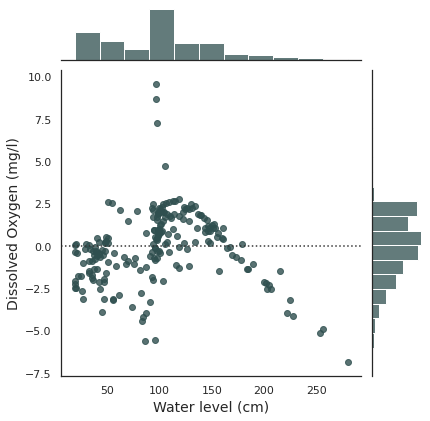

In [74]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')

fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_waterlevel_17, y=resampled_oxygen1, kind="resid", color="darkslategray", )
ax.set_axis_labels(r'Water level (cm)',  r'Dissolved Oxygen (mg/l)', fontsize=14)
# ax.fig.suptitle('Residual Plot', fontsize=14)
# plt.savefig(path_to_file + 'plots/Oxyen_Waterlevel2017_Residual.png', dpi=300)
plt.show()

<Figure size 576x432 with 0 Axes>

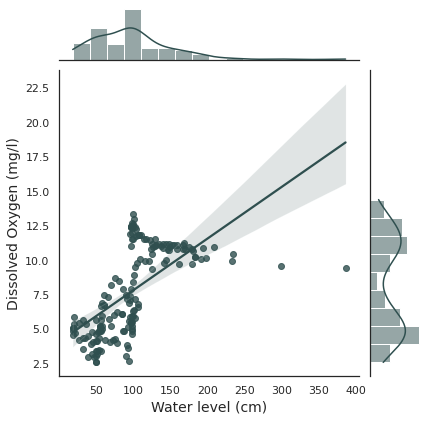

In [75]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')

fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_waterlevel_21, y=resampled_oxygen21, kind="reg", color="darkslategray")
ax.set_axis_labels(r'Water level (cm)',  r'Dissolved Oxygen (mg/l)', fontsize=14)
# ax.fig.suptitle('Regression Plot', fontsize=14)
# plt.savefig(path_to_file + 'plots/Oxyen_Waterlevel2021.png', dpi=300)
plt.show()

<Figure size 576x432 with 0 Axes>

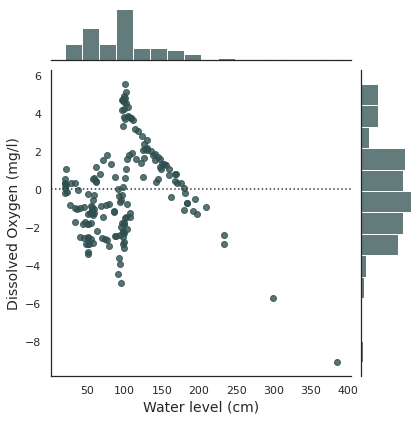

In [76]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')

fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_waterlevel_21, y=resampled_oxygen21, kind="resid", color="darkslategray")
ax.set_axis_labels(r'Water level (cm)',  r'Dissolved Oxygen (mg/l)', fontsize=14)
# ax.fig.suptitle('Residual Plot', fontsize=14)
# plt.savefig(path_to_file + 'plots/Oxyen_Waterlevel2021_Residual.png', dpi=300)
plt.show()

In [77]:
print ('len 02, len wl', len(resampled_oxygen21), len(resampled_waterlevel_21), type(resampled_oxygen21), type(resampled_waterlevel_21))
print ('len 02:17, len wl:17', len(resampled_oxygen1), len(resampled_waterlevel_17))

resampled_oxygen21_arr = resampled_oxygen21.to_numpy()
resampled_waterlevel_21_arr = resampled_waterlevel_21.to_numpy()
resampled_waterlevel_21_arr = resampled_waterlevel_21_arr[~np.isnan(resampled_waterlevel_21_arr)]

resampled_oxygen1_arr = resampled_oxygen1.to_numpy()
resampled_waterlevel_17_arr = resampled_waterlevel_17.to_numpy()

print ('check shapes: ', resampled_oxygen1_arr.shape, resampled_oxygen21_arr.shape)
print ('check shapes: ', resampled_waterlevel_17_arr.shape, resampled_waterlevel_21_arr.shape)

np.random.seed(0)

waterlevel_17_selected = np.random.choice(resampled_waterlevel_17_arr, 214)
oxygen_21_selected = np.random.choice(resampled_oxygen21_arr, 172)

number_of_notnans = np.count_nonzero(~np.isnan(resampled_waterlevel_21_arr))
print ('number of not nans: ', number_of_notnans)
# print (resampled_waterlevel_21_arr)


from scipy import  stats

ro_w17, po_w17 = stats.pearsonr(x=waterlevel_17_selected, y=resampled_oxygen1)
print (ro_w17, po_w17)

ro_w21, po_w21 = stats.pearsonr(x=resampled_waterlevel_21_arr, y=oxygen_21_selected)
print (ro_w21, po_w21)

len 02, len wl 209 186 <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
len 02:17, len wl:17 214 238
check shapes:  (214,) (209,)
check shapes:  (238,) (172,)
number of not nans:  172
0.021360569509603085 0.7560412423559068
0.03658294644960214 0.6337595998548269


<Figure size 576x432 with 0 Axes>

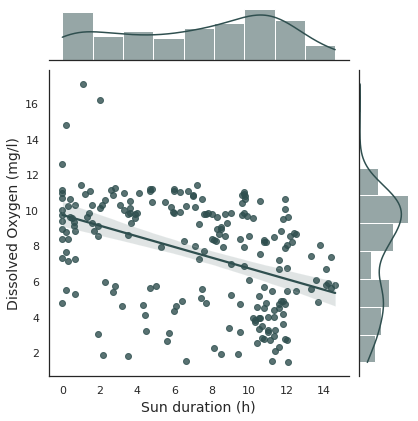

In [78]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')

fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_sun_duration_meteo, y=resampled_oxygen1, kind="reg", color="darkslategray")
ax.set_axis_labels(r'Sun duration (h)',  r'Dissolved Oxygen (mg/l)', fontsize=14)
# ax.fig.suptitle('Regression Plot', fontsize=14)
# plt.savefig(path_to_file + 'plots/Oxyen_SunDuration2017.png', dpi=300)
plt.show()

<Figure size 576x432 with 0 Axes>

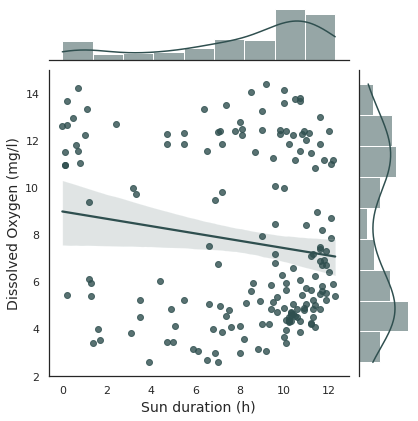

In [79]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')

fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_sun_duration_meteo21, y=resampled_oxygen21, kind="reg", color="darkslategray")
ax.set_axis_labels(r'Sun duration (h)',  r'Dissolved Oxygen (mg/l)', fontsize=14)
# ax.fig.suptitle('Regression Plot', fontsize=14)
# plt.savefig(path_to_file + 'plots/Oxyen_SunDuration2021.png', dpi=300)
plt.show()

<Figure size 576x432 with 0 Axes>

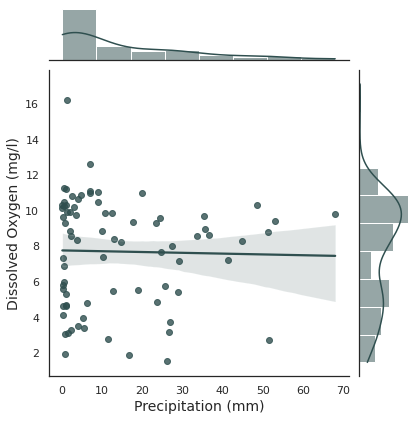

In [80]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')

fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_rain_meteo_nonzero, y=resampled_oxygen1, kind="reg", color="darkslategray")
ax.set_axis_labels(r'Precipitation (mm)',  r'Dissolved Oxygen (mg/l)', fontsize=14)
# ax.fig.suptitle('Regression Plot', fontsize=14)
# plt.savefig(path_to_file + 'plots/Oxyen_Rainfall2017.png', dpi=300)
plt.show()

<Figure size 576x432 with 0 Axes>

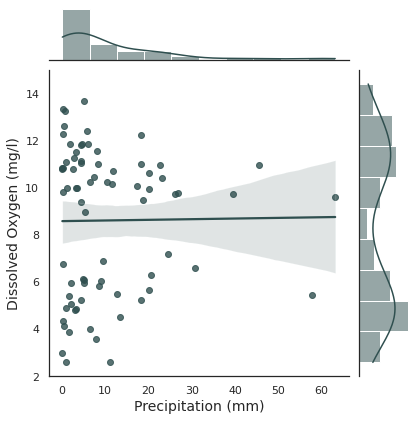

In [81]:
sns.set(font_scale = 1.1)
sns.set_theme(style='white')

fig=plt.figure(figsize=(8, 6))
ax = sns.jointplot(x=resampled_rain_meteo21_nonzero, y=resampled_oxygen21, kind="reg", color="darkslategray")
ax.set_axis_labels(r'Precipitation (mm)',  r'Dissolved Oxygen (mg/l)', fontsize=14)
# ax.fig.suptitle('Regression Plot', fontsize=14)
# plt.savefig(path_to_file + 'plots/Oxyen_Rainfall2021.png', dpi=300)
plt.show()